<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [118]:
import pandas as pd
import numpy as np

In [119]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [120]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [121]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])


**Test Set**
  
Use this set to test your model

In [122]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [123]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [124]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [125]:

df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [126]:

df_train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21768,False
21769,False
21770,False
21771,False


5. Check how many rows belong to each class

In [127]:
df_train["label"].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [128]:

# no duplicate rows have been found

7. Remove rows with NaN values

In [129]:

# no rows with nan values have been found

8. Convert all text to lowercase

In [130]:
df_train["text"] = df_train["text"].str.lower()

9. Remove digits, URLS and special characters

In [131]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download("stopwords")

def clean_message(message):
    message = re.sub(r"http\S+|www\S+|https\S+", " ", message, flags=re.MULTILINE)
    message = re.sub(r"\d+", " ", message)
    message = re.sub(r"[^A-Za-z]", " ", message)
    message = message.lower()
    message = message.split()
    stemmer = PorterStemmer()
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))]
    return " ".join(message)

df_train['clean_text'] = df_train['text'].apply(clean_message)
print(df_train[['text', 'clean_text']].head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  presidential candidate mar roxas implies that ...   
1  parang may mali na sumunod ang patalastas ng n...   
2                    bet ko. pula ang kulay ng posas   
3                               [username] kakampink   
4  bakit parang tahimik ang mga pink about doc wi...   

                                          clean_text  
0  presidenti candid mar roxa impli govt liabl la...  
1  parang may mali na sumunod ang patalasta ng ne...  
2                      bet ko pula ang kulay ng posa  
3                                  usernam kakampink  
4  bakit parang tahimik ang mga pink doc willi on...  


10. Remove stop words

In [132]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download("stopwords")

def clean_message(message):
    message = re.sub("[^A-Za-z]", " ", message)
    message = message.lower()
    message = message.split()
    stemmer = PorterStemmer()
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] #5
    message = " ".join(message)
    return message


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


11. Use Stemming or Lemmatization

In [133]:

df_train["text"] = df_train["text"].apply(clean_message)

## C. Training your model

12. Put all text training data in variable **X_train**

In [134]:

X_train = df_train["text"]


13. Put all training data labels in variable **y_train**

In [135]:

y_train = df_train["label"]


14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [136]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)


15. Create an instance of `MultinomalNB()`

In [137]:

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()




16. Train the model using `.fit()`

In [138]:

model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [139]:

X_validation = df_validation["text"]

X_validation_transformed = vectorizer.transform(X_validation)

y_validation_pred = model.predict(X_validation_transformed)


18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [140]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_validation = df_validation["label"]

accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred, average="weighted")
recall = recall_score(y_validation, y_validation_pred, average="weighted")
f1 = f1_score(y_validation, y_validation_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.8146428571428571
Precision: 0.8196282750226879
Recall: 0.8146428571428571
F1-Score: 0.8137534122559269


19. Create a confusion matrix using the **validation dataset**

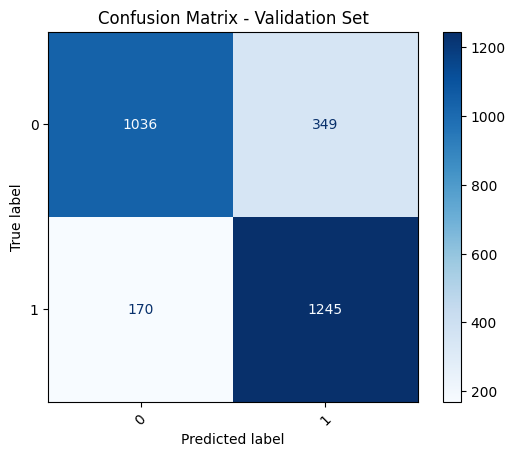

In [141]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_validation, y_validation_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

plt.title("Confusion Matrix - Validation Set")
plt.show()


20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [142]:

X_test = df_test["text"]

X_test_transformed = vectorizer.transform(X_test)

y_test_pred = model.predict(X_test_transformed)


21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [143]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test = df_test["label"]


accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.8149466192170819
Precision: 0.8195104311223992
Recall: 0.8149466192170819
F1-Score: 0.8143535455124954


22. Create a confusion matrix using the **test dataset**

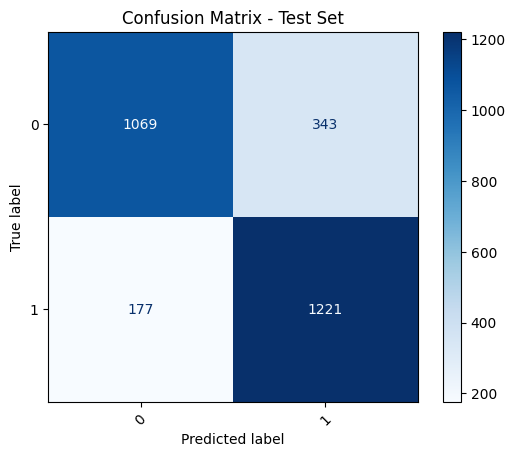

In [144]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

plt.title("Confusion Matrix - Test Set")
plt.show()


## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [145]:

sample_text = "Mahal kita"

sample_clean = clean_message(sample_text)

sample_transformed = vectorizer.transform([sample_clean])

sample_pred = model.predict(sample_transformed)

print("Prediction:", sample_pred[0])


Prediction: 0


24. Test the model by providing a hate speech input. The model should predict it as 1

In [146]:

sample_text = "Hayop ka"

sample_clean = clean_message(sample_text)

sample_transformed = vectorizer.transform([sample_clean])

sample_pred = model.predict(sample_transformed)

print("Prediction:", sample_pred[0])


Prediction: 1
